In [557]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.svm._libsvm import decision_function

In [558]:
# Read the wine dataset
dataset = load_wine()
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
df = df.assign(target=pd.Series(dataset['target']).values)

In [559]:
# Filter the irrelevant columns
df = df[['alcohol', 'magnesium', 'target']]
# Filter the irrelevant label
df = df[df.target != 0]

In [560]:
train_df, val_df = train_test_split(df, test_size=30, random_state=3)

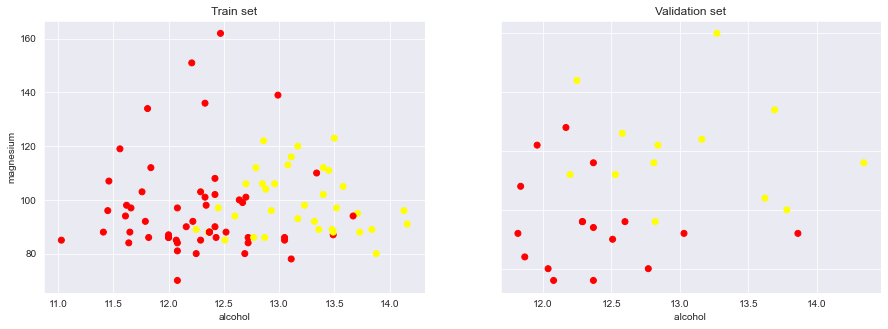

In [561]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].scatter(x=train_df.iloc[:,0],y=train_df.iloc[:,1],c=train_df.iloc[:,2], cmap='autumn')
axes[0].set_title('Train set')
axes[0].set(xlabel='alcohol', ylabel='magnesium')
axes[0].label_outer()
axes[1].scatter(x=val_df.iloc[:,0],y=val_df.iloc[:,1],c=val_df.iloc[:,2], cmap='autumn')
axes[1].set_title('Validation set')
axes[1].set(xlabel='alcohol ', ylabel='magnesium')
axes[1].label_outer()

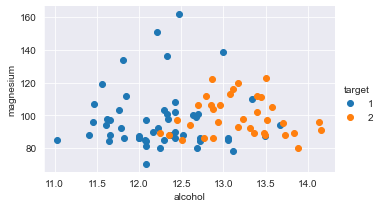

In [562]:
fg = sns.FacetGrid(data=train_df, hue='target', aspect=1.61)
fg.map(plt.scatter,'alcohol','magnesium').add_legend()

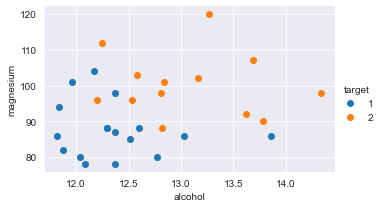

In [563]:
fg = sns.FacetGrid(data=val_df, hue='target', aspect=1.61)
fg.map(plt.scatter, 'alcohol','magnesium').add_legend()

question 1: both of the datasets aren't linearly seperable, so, using the linear kernel, we wont get any solution

question 2:

In [564]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=20, linewidth=0.5, facecolors='none', edgecolor='Black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


In [565]:

X_train = train_df[['alcohol','magnesium']]
y_train =train_df['target']
X_val = val_df[['alcohol','magnesium']]
y_val = val_df['target']

In [566]:
def plot_svm(X,y,model,ax=None,plot_support=True):
        ax = ax or plt.gca()
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=10, cmap='cool')
        ax.set_xlim(7, 22)
        ax.set_ylim(60, 200)
        ax.set_xlabel("alcohol")
        ax.set_ylabel("magnesium")
        plot_svc_decision_function(model, ax, plot_support)

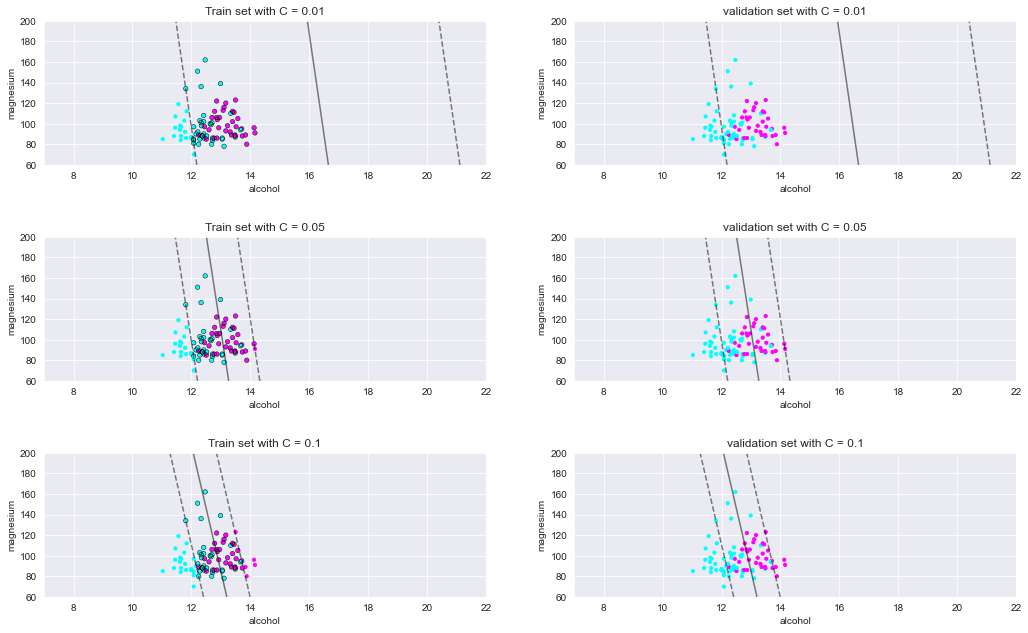

In [567]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9,hspace=0.5)
for i,c in enumerate([0.01,0.05,0.1]):
    model = SVC(kernel='linear', C=c)
    model.fit(X_train,y_train)
    for j in range(2):
        if j==0:
            plot_svm(X_train,y_train,model,ax=axes[i][j],plot_support=True)
            axes[i][j].set_title('Train set with C = {0}'.format(c))
        else:
            plot_svm(X_train,y_train,model,ax=axes[i][j],plot_support=False)
            axes[i][j].set_title('validation set with C = {0}'.format(c))



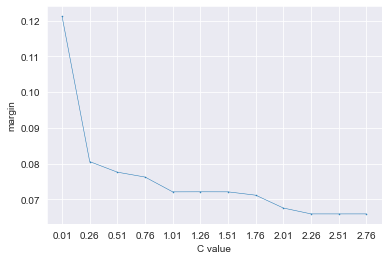

In [568]:
#question 5
margins = []
Cs = np.arange(0.01,3,0.25)
for c in Cs:
    model = SVC(kernel='linear', C=c)
    model.fit(X_train,y_train)
    w0=model.decision_function(X_train)
    margins.append(1/np.linalg.norm(w0))
plt.plot(Cs,margins,marker='o',linewidth='0.5',markersize='0.5')
plt.xlabel("C value")
plt.ylabel('margin')
plt.xticks(Cs)
plt.show()

Question 4: we can see that the larger the C, the smaller the margin.
the loss function consists of 2 factors, ||W|| and "sigma".
minimizing the former, maximizes the margin, and minimizing the latter, minimizes the error
since C is a coefficient of "sigmna", smaller we want to nake the error (increasing C) the smaller the margin becomes